In [34]:
# IMPORTAR LIBRERIAS NECESARIAS PARA REALIZAR EL MODELO DE ENTRENAMIENTO RANDOM FOREST
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [2]:
# EJECUTAR EL PROCESAMIENTO DE LOS DATOS DE ENTRENAMIENTO PARA EL MONOXIDO DE CARBONO
%run utils/ProcesarDatosCO.ipynb

SE HA PROCESADO EL DATASET CORRECTAMENTE!!
                         FECHA  COTOCOLLAO    CO_ppm  CO_AQI Categoria_CO
9997   2005-02-25 14:00:00.000       1.790  1.562496    18.0        Bueno
9998   2005-02-25 15:00:00.000       1.830  1.597412    18.0        Bueno
9999   2005-02-25 16:00:00.000       1.850  1.614870    18.0        Bueno
10000  2005-02-25 17:00:00.000       1.850  1.614870    18.0        Bueno
10001  2005-02-25 18:00:00.000       1.950  1.702160    19.0        Bueno
...                        ...         ...       ...     ...          ...
191661 2025-11-26 04:00:03.035       0.030  0.026187     0.0        Bueno
191662 2025-11-26 05:00:03.040       0.242  0.211242     2.0        Bueno
191663 2025-11-26 06:00:03.045       0.941  0.821401     9.0        Bueno
191664 2025-11-26 07:00:03.050       1.322  1.153977    13.0        Bueno
191665 2025-11-26 08:00:03.055       0.859  0.749823     9.0        Bueno

[171422 rows x 5 columns]


In [3]:
#LEER EL DATAFRAME PROCESADO PARA EL MONOXIDO DE CARBONO
df_co = pd.read_excel("datos_procesados/datosProcesadosCO.xlsx")
df_co = df_co.drop(columns=["COTOCOLLAO"]) # ELIMINAR LA COLUMNA COTOCOLLAO
df_co

,FECHA,CO_ppm,CO_AQI,Categoria_CO
0,2005-02-25 14:00:00.000,1.562496,18,Bueno
1,2005-02-25 15:00:00.000,1.597412,18,Bueno
2,2005-02-25 16:00:00.000,1.614870,18,Bueno
3,2005-02-25 17:00:00.000,1.614870,18,Bueno
4,2005-02-25 18:00:00.000,1.702160,19,Bueno
...,...,...,...,...
171417,2025-11-26 04:00:03.035,0.026187,0,Bueno
171418,2025-11-26 05:00:03.040,0.211242,2,Bueno
171419,2025-11-26 06:00:03.045,0.821401,9,Bueno
171420,2025-11-26 07:00:03.050,1.153977,13,Bueno


In [4]:
# EJECUTAR EL PROCESAMIENTO DE LOS DATOS DE ENTRENAMIENTO PARA EL DIOXIDO DE NITROGENO
%run utils/ProcesarDatosNO2.ipynb

SE HA PROCESADO EL DATASET CORRECTAMENTE!!
                         FECHA  COTOCOLLAO    NO2_ppb  NO2_AQI Categoria_NO2
10114  2005-02-25 14:00:00.000       22.21  11.803815     11.0         Bueno
10115  2005-02-25 15:00:00.000       22.31  11.856961     11.0         Bueno
10116  2005-02-25 16:00:00.000       22.54  11.979198     11.0         Bueno
10117  2005-02-25 17:00:00.000       23.09  12.271503     12.0         Bueno
10118  2005-02-25 18:00:00.000       30.04  15.965178     15.0         Bueno
...                        ...         ...        ...      ...           ...
191924 2025-11-30 18:59:56.400       18.80   9.991523      9.0         Bueno
191925 2025-11-30 19:59:56.395       29.43  15.640985     15.0         Bueno
191926 2025-11-30 20:59:56.390       30.34  16.124617     15.0         Bueno
191927 2025-11-30 21:59:56.385       28.53  15.162667     14.0         Bueno
191928 2025-11-30 22:59:56.380       22.57  11.995142     11.0         Bueno

[155877 rows x 5 columns]


In [5]:
#LEER EL DATAFRAME PROCESADO PARA EL DIOXIDO DE NITROGENO
df_no2 = pd.read_excel("datos_procesados/datosProcesadosNO2.xlsx")
df_no2 = df_no2.drop(columns=["COTOCOLLAO"]) # ELIMINAR LA COLUMNA COTOCOLLAO
df_no2

,FECHA,NO2_ppb,NO2_AQI,Categoria_NO2
0,2005-02-25 14:00:00.000,11.803815,11.0,Bueno
1,2005-02-25 15:00:00.000,11.856961,11.0,Bueno
2,2005-02-25 16:00:00.000,11.979198,11.0,Bueno
3,2005-02-25 17:00:00.000,12.271503,12.0,Bueno
4,2005-02-25 18:00:00.000,15.965178,15.0,Bueno
...,...,...,...,...
155872,2025-11-30 18:59:56.400,9.991523,9.0,Bueno
155873,2025-11-30 19:59:56.395,15.640985,15.0,Bueno
155874,2025-11-30 20:59:56.390,16.124617,15.0,Bueno
155875,2025-11-30 21:59:56.385,15.162667,14.0,Bueno


In [6]:
# EJECUTAR EL PROCESAMIENTO DE LOS DATOS DE ENTRENAMIENTO PARA EL OZONO
%run utils/ProcesarDatosO3.ipynb

SE HA PROCESADO EL DATASET CORRECTAMENTE!!
                     Fecha  COTOCOLLAO     O3_ppb  O3_AQI Categoria_O3
10116  2005-02-25 13:00:00       60.77  30.954719    29.0        Bueno
10117  2005-02-25 14:00:00       61.06  31.102438    29.0        Bueno
10118  2005-02-25 15:00:00       56.20  28.626875    27.0        Bueno
10119  2005-02-25 16:00:00       51.08  26.018875    24.0        Bueno
10120  2005-02-25 17:00:00       47.30  24.093438    22.0        Bueno
...                    ...         ...        ...     ...          ...
191928 2025-11-30 19:00:00       14.68   7.477625     7.0        Bueno
191929 2025-11-30 20:00:00        7.14   3.636938     3.0        Bueno
191930 2025-11-30 21:00:00        8.20   4.176875     4.0        Bueno
191931 2025-11-30 22:00:00        3.74   1.905063     2.0        Bueno
191932 2025-11-30 23:00:00        7.62   3.881438     4.0        Bueno

[173790 rows x 5 columns]


In [7]:
#LEER EL DATAFRAME PROCESADO PARA EL OZONO
df_o3 = pd.read_excel("datos_procesados/datosProcesadosO3.xlsx")
df_o3 = df_o3.drop(columns=["COTOCOLLAO"]) # ELIMINAR LA COLUMNA COTOCOLLAO
# RENOMBRAR LA COLUMNA POR FECHA
df_o3.rename(columns={
    "Fecha": "FECHA",
}, inplace=True)

df_o3

,FECHA,O3_ppb,O3_AQI,Categoria_O3
0,2005-02-25 13:00:00,30.954719,29.0,Bueno
1,2005-02-25 14:00:00,31.102438,29.0,Bueno
2,2005-02-25 15:00:00,28.626875,27.0,Bueno
3,2005-02-25 16:00:00,26.018875,24.0,Bueno
4,2005-02-25 17:00:00,24.093438,22.0,Bueno
...,...,...,...,...
173785,2025-11-30 19:00:00,7.477625,7.0,Bueno
173786,2025-11-30 20:00:00,3.636938,3.0,Bueno
173787,2025-11-30 21:00:00,4.176875,4.0,Bueno
173788,2025-11-30 22:00:00,1.905063,2.0,Bueno


In [8]:
# EJECUTAR EL PROCESAMIENTO DE LOS DATOS DE ENTRENAMIENTO PARA EL DIOXIDO DE AZUFRE
%run utils/ProcesarDatosSO2.ipynb

SE HA PROCESADO EL DATASET CORRECTAMENTE!!
                     Fecha  COTOCOLLAO   SO2_ppb  SO2_AQI Categoria_SO2
11439  2005-04-22 04:00:00    4.090385  1.561045        2         Bueno
11440  2005-04-22 05:00:00    4.090385  1.561045        2         Bueno
11441  2005-04-22 06:00:00    4.482692  1.710764        2         Bueno
11442  2005-04-22 07:00:00    4.482692  1.710764        2         Bueno
11443  2005-04-22 08:00:00    4.678846  1.785624        3         Bueno
...                    ...         ...       ...      ...           ...
191911 2025-11-30 19:00:00    0.240000  0.091593        0         Bueno
191912 2025-11-30 20:00:00    0.350000  0.133573        0         Bueno
191913 2025-11-30 21:00:00    0.850000  0.324392        0         Bueno
191914 2025-11-30 22:00:00    0.760000  0.290045        0         Bueno
191915 2025-11-30 23:00:00    0.500000  0.190819        0         Bueno

[170752 rows x 5 columns]


In [9]:
#LEER EL DATAFRAME PROCESADO PARA EL DIOXIDO DE AZUFRE
df_so2 = pd.read_excel("datos_procesados/datosProcesadosSO2.xlsx")
df_so2 = df_so2.drop(columns=["COTOCOLLAO"]) # ELIMINAR LA COLUMNA COTOCOLLAO
# RENOMBRAR LA COLUMNA POR FECHA
df_so2.rename(columns={
    "Fecha": "FECHA",
}, inplace=True)

df_so2

,FECHA,SO2_ppb,SO2_AQI,Categoria_SO2
0,2005-04-22 04:00:00,1.561045,2,Bueno
1,2005-04-22 05:00:00,1.561045,2,Bueno
2,2005-04-22 06:00:00,1.710764,2,Bueno
3,2005-04-22 07:00:00,1.710764,2,Bueno
4,2005-04-22 08:00:00,1.785624,3,Bueno
...,...,...,...,...
170747,2025-11-30 19:00:00,0.091593,0,Bueno
170748,2025-11-30 20:00:00,0.133573,0,Bueno
170749,2025-11-30 21:00:00,0.324392,0,Bueno
170750,2025-11-30 22:00:00,0.290045,0,Bueno


In [10]:
# EJECUTAR EL PROCESAMIENTO DE LOS DATOS DE ENTRENAMIENTO PARA EL DIOXIDO DE NITROGENO
%run utils/ProcesarDatosPM25.ipynb

SE HA PROCESADO EL DATASET CORRECTAMENTE!!
                         FECHA  PM25 ug/m3  PM25_AQI Categoria_PM25
4383   2005-02-25 10:00:00.000        0.00       0.0          Bueno
4384   2005-02-25 11:00:00.000        0.00       0.0          Bueno
4386   2005-02-25 13:00:00.000        0.00       0.0          Bueno
4387   2005-02-25 14:00:00.000        0.00       0.0          Bueno
4388   2005-02-25 15:00:00.000        0.00       0.0          Bueno
...                        ...         ...       ...            ...
186335 2025-11-30 18:00:03.585        5.62      23.0          Bueno
186336 2025-11-30 19:00:03.590        6.84      28.0          Bueno
186337 2025-11-30 20:00:03.595        7.65      32.0          Bueno
186338 2025-11-30 21:00:03.600        3.46      14.0          Bueno
186339 2025-11-30 22:00:03.605        5.54      23.0          Bueno

[174294 rows x 4 columns]


In [11]:
#LEER EL DATAFRAME PROCESADO PARA PM25
df_pm25 = pd.read_excel("datos_procesados/datosProcesadosPM25.xlsx")
df_pm25

,FECHA,PM25 ug/m3,PM25_AQI,Categoria_PM25
0,2005-02-25 10:00:00.000,0.00,0,Bueno
1,2005-02-25 11:00:00.000,0.00,0,Bueno
2,2005-02-25 13:00:00.000,0.00,0,Bueno
3,2005-02-25 14:00:00.000,0.00,0,Bueno
4,2005-02-25 15:00:00.000,0.00,0,Bueno
...,...,...,...,...
174289,2025-11-30 18:00:03.585,5.62,23,Bueno
174290,2025-11-30 19:00:03.590,6.84,28,Bueno
174291,2025-11-30 20:00:03.595,7.65,32,Bueno
174292,2025-11-30 21:00:03.600,3.46,14,Bueno


In [12]:
# UNIR LOS DATAFRAMES CON IGUAL FECHGA
training_df = pd.merge(df_co, df_no2, on='FECHA', how='inner')
training_df = pd.merge(training_df, df_o3, on='FECHA', how='inner')
training_df = pd.merge(training_df, df_so2, on='FECHA', how='inner')
training_df = pd.merge(training_df, df_pm25, on='FECHA', how='inner')
training_df


,FECHA,CO_ppm,CO_AQI,Categoria_CO,NO2_ppb,NO2_AQI,Categoria_NO2,O3_ppb,O3_AQI,Categoria_O3,SO2_ppb,SO2_AQI,Categoria_SO2,PM25 ug/m3,PM25_AQI,Categoria_PM25
0,2005-04-28 04:00:00,1.623599,18,Bueno,11.734724,11.0,Bueno,7.523469,7.0,Bueno,2.159923,3,Bueno,12.64,52,Moderado
1,2005-04-28 05:00:00,1.771992,20,Bueno,12.701989,12.0,Bueno,7.554031,7.0,Bueno,2.159923,3,Bueno,16.26,60,Moderado
2,2005-04-28 06:00:00,2.156069,25,Bueno,14.152886,13.0,Bueno,7.711938,7.0,Bueno,1.935343,3,Bueno,27.76,84,Moderado
3,2005-04-28 07:00:00,2.199714,25,Bueno,15.040430,14.0,Bueno,8.689937,8.0,Bueno,1.935343,3,Bueno,24.78,78,Moderado
4,2005-04-28 08:00:00,1.920386,22,Bueno,14.397359,14.0,Bueno,13.646156,13.0,Bueno,2.122493,3,Bueno,17.52,62,Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135193,2025-10-31 19:00:00,0.528979,6,Bueno,27.747734,26.0,Bueno,3.769375,3.0,Bueno,0.988442,1,Bueno,14.90,57,Moderado
135194,2025-10-31 20:00:00,0.501046,6,Bueno,27.242843,26.0,Bueno,5.047906,5.0,Bueno,1.057136,2,Bueno,15.17,57,Moderado
135195,2025-10-31 21:00:00,1.131282,13,Bueno,30.506032,29.0,Bueno,0.646906,1.0,Bueno,1.205975,2,Bueno,12.73,52,Moderado
135196,2025-10-31 22:00:00,1.553767,18,Bueno,27.024943,25.0,Bueno,0.728406,1.0,Bueno,1.205975,2,Bueno,24.29,77,Moderado


In [13]:
#ELIMINAMOS LAS FILAS CON VALORES NAN
training_df = training_df.dropna()
training_df

,FECHA,CO_ppm,CO_AQI,Categoria_CO,NO2_ppb,NO2_AQI,Categoria_NO2,O3_ppb,O3_AQI,Categoria_O3,SO2_ppb,SO2_AQI,Categoria_SO2,PM25 ug/m3,PM25_AQI,Categoria_PM25
0,2005-04-28 04:00:00,1.623599,18,Bueno,11.734724,11.0,Bueno,7.523469,7.0,Bueno,2.159923,3,Bueno,12.64,52,Moderado
1,2005-04-28 05:00:00,1.771992,20,Bueno,12.701989,12.0,Bueno,7.554031,7.0,Bueno,2.159923,3,Bueno,16.26,60,Moderado
2,2005-04-28 06:00:00,2.156069,25,Bueno,14.152886,13.0,Bueno,7.711938,7.0,Bueno,1.935343,3,Bueno,27.76,84,Moderado
3,2005-04-28 07:00:00,2.199714,25,Bueno,15.040430,14.0,Bueno,8.689937,8.0,Bueno,1.935343,3,Bueno,24.78,78,Moderado
4,2005-04-28 08:00:00,1.920386,22,Bueno,14.397359,14.0,Bueno,13.646156,13.0,Bueno,2.122493,3,Bueno,17.52,62,Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135193,2025-10-31 19:00:00,0.528979,6,Bueno,27.747734,26.0,Bueno,3.769375,3.0,Bueno,0.988442,1,Bueno,14.90,57,Moderado
135194,2025-10-31 20:00:00,0.501046,6,Bueno,27.242843,26.0,Bueno,5.047906,5.0,Bueno,1.057136,2,Bueno,15.17,57,Moderado
135195,2025-10-31 21:00:00,1.131282,13,Bueno,30.506032,29.0,Bueno,0.646906,1.0,Bueno,1.205975,2,Bueno,12.73,52,Moderado
135196,2025-10-31 22:00:00,1.553767,18,Bueno,27.024943,25.0,Bueno,0.728406,1.0,Bueno,1.205975,2,Bueno,24.29,77,Moderado


In [14]:
print(training_df.columns)
print(training_df.dtypes)

Index(['FECHA', 'CO_ppm', 'CO_AQI', 'Categoria_CO', 'NO2_ppb', 'NO2_AQI',
       'Categoria_NO2', 'O3_ppb', 'O3_AQI', 'Categoria_O3', 'SO2_ppb',
       'SO2_AQI', 'Categoria_SO2', 'PM25 ug/m3', 'PM25_AQI', 'Categoria_PM25'],
      dtype='object')
FECHA             datetime64[ns]
CO_ppm                   float64
CO_AQI                     int64
Categoria_CO              object
NO2_ppb                  float64
NO2_AQI                  float64
Categoria_NO2             object
O3_ppb                   float64
O3_AQI                   float64
Categoria_O3              object
SO2_ppb                  float64
SO2_AQI                    int64
Categoria_SO2             object
PM25 ug/m3               float64
PM25_AQI                   int64
Categoria_PM25            object
dtype: object


In [15]:
training_df = training_df.loc[:, ~training_df.columns.duplicated()]
training_df = training_df.drop(columns=['CO_ppm', 'NO2_ppb','O3_ppb', 'SO2_ppb','PM25 ug/m3'])
training_df

,FECHA,CO_AQI,Categoria_CO,NO2_AQI,Categoria_NO2,O3_AQI,Categoria_O3,SO2_AQI,Categoria_SO2,PM25_AQI,Categoria_PM25
0,2005-04-28 04:00:00,18,Bueno,11.0,Bueno,7.0,Bueno,3,Bueno,52,Moderado
1,2005-04-28 05:00:00,20,Bueno,12.0,Bueno,7.0,Bueno,3,Bueno,60,Moderado
2,2005-04-28 06:00:00,25,Bueno,13.0,Bueno,7.0,Bueno,3,Bueno,84,Moderado
3,2005-04-28 07:00:00,25,Bueno,14.0,Bueno,8.0,Bueno,3,Bueno,78,Moderado
4,2005-04-28 08:00:00,22,Bueno,14.0,Bueno,13.0,Bueno,3,Bueno,62,Moderado
...,...,...,...,...,...,...,...,...,...,...,...
135193,2025-10-31 19:00:00,6,Bueno,26.0,Bueno,3.0,Bueno,1,Bueno,57,Moderado
135194,2025-10-31 20:00:00,6,Bueno,26.0,Bueno,5.0,Bueno,2,Bueno,57,Moderado
135195,2025-10-31 21:00:00,13,Bueno,29.0,Bueno,1.0,Bueno,2,Bueno,52,Moderado
135196,2025-10-31 22:00:00,18,Bueno,25.0,Bueno,1.0,Bueno,2,Bueno,77,Moderado


In [16]:
# CALCULAR EL AQI OVERALL MÁXIMO DE UN DATO DE MUESTRA
aqi_cols = ['CO_AQI', 'NO2_AQI', 'O3_AQI', 'SO2_AQI', 'PM25_AQI']

training_df['AQI_OVERALL'] = training_df[aqi_cols].max(axis=1)

# FUNCIÓN PARA CALCULAR LA CATEGORÍA DEL AQI OVERALL
def aqi_category(aqi):
    if aqi <= 50:
        return 'Bueno'
    elif aqi <= 100:
        return 'Moderado'
    elif aqi <= 150:
        return 'No saludable para grupos sensibles'
    elif aqi <= 200:
        return 'No saludable'
    elif aqi <= 300:
        return 'Muy poco saludable'
    else:
        return 'Peligrosa'

training_df['AQI_CATEGORY'] = training_df['AQI_OVERALL'].apply(aqi_category)


training_df


,FECHA,CO_AQI,Categoria_CO,NO2_AQI,Categoria_NO2,O3_AQI,Categoria_O3,SO2_AQI,Categoria_SO2,PM25_AQI,Categoria_PM25,AQI_OVERALL,AQI_CATEGORY
0,2005-04-28 04:00:00,18,Bueno,11.0,Bueno,7.0,Bueno,3,Bueno,52,Moderado,52.0,Moderado
1,2005-04-28 05:00:00,20,Bueno,12.0,Bueno,7.0,Bueno,3,Bueno,60,Moderado,60.0,Moderado
2,2005-04-28 06:00:00,25,Bueno,13.0,Bueno,7.0,Bueno,3,Bueno,84,Moderado,84.0,Moderado
3,2005-04-28 07:00:00,25,Bueno,14.0,Bueno,8.0,Bueno,3,Bueno,78,Moderado,78.0,Moderado
4,2005-04-28 08:00:00,22,Bueno,14.0,Bueno,13.0,Bueno,3,Bueno,62,Moderado,62.0,Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135193,2025-10-31 19:00:00,6,Bueno,26.0,Bueno,3.0,Bueno,1,Bueno,57,Moderado,57.0,Moderado
135194,2025-10-31 20:00:00,6,Bueno,26.0,Bueno,5.0,Bueno,2,Bueno,57,Moderado,57.0,Moderado
135195,2025-10-31 21:00:00,13,Bueno,29.0,Bueno,1.0,Bueno,2,Bueno,52,Moderado,52.0,Moderado
135196,2025-10-31 22:00:00,18,Bueno,25.0,Bueno,1.0,Bueno,2,Bueno,77,Moderado,77.0,Moderado


In [17]:
#IMPRIMIR EL ESTADO GENERAL Y UN RESUMEN DEL DATAFRAMAE CONSOLIDADO
print("ESTADO GENERAL DEL DATAFRAME")
print(training_df.info())
print("RESUMEN DEL DATAFRAME")
print(training_df.describe())

ESTADO GENERAL DEL DATAFRAME
<class 'pandas.core.frame.DataFrame'>
Index: 135176 entries, 0 to 135197
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA           135176 non-null  datetime64[ns]
 1   CO_AQI          135176 non-null  int64         
 2   Categoria_CO    135176 non-null  object        
 3   NO2_AQI         135176 non-null  float64       
 4   Categoria_NO2   135176 non-null  object        
 5   O3_AQI          135176 non-null  float64       
 6   Categoria_O3    135176 non-null  object        
 7   SO2_AQI         135176 non-null  int64         
 8   Categoria_SO2   135176 non-null  object        
 9   PM25_AQI        135176 non-null  int64         
 10  Categoria_PM25  135176 non-null  object        
 11  AQI_OVERALL     135176 non-null  float64       
 12  AQI_CATEGORY    135176 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usag

In [18]:
# SELECCIONAR EL AÑO, MES Y DIA DE CADA MUESTRA PARA EL MODELO DE ENTRENAMIENTO
training_df["Anio"] = training_df["FECHA"].dt.year
training_df["Mes"] = training_df["FECHA"].dt.month
training_df["Dia"] = training_df["FECHA"].dt.day
training_df["Hora"] = training_df["FECHA"].dt.hour

training_df

,FECHA,CO_AQI,Categoria_CO,NO2_AQI,Categoria_NO2,O3_AQI,Categoria_O3,SO2_AQI,Categoria_SO2,PM25_AQI,Categoria_PM25,AQI_OVERALL,AQI_CATEGORY,Anio,Mes,Dia,Hora
0,2005-04-28 04:00:00,18,Bueno,11.0,Bueno,7.0,Bueno,3,Bueno,52,Moderado,52.0,Moderado,2005,4,28,4
1,2005-04-28 05:00:00,20,Bueno,12.0,Bueno,7.0,Bueno,3,Bueno,60,Moderado,60.0,Moderado,2005,4,28,5
2,2005-04-28 06:00:00,25,Bueno,13.0,Bueno,7.0,Bueno,3,Bueno,84,Moderado,84.0,Moderado,2005,4,28,6
3,2005-04-28 07:00:00,25,Bueno,14.0,Bueno,8.0,Bueno,3,Bueno,78,Moderado,78.0,Moderado,2005,4,28,7
4,2005-04-28 08:00:00,22,Bueno,14.0,Bueno,13.0,Bueno,3,Bueno,62,Moderado,62.0,Moderado,2005,4,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135193,2025-10-31 19:00:00,6,Bueno,26.0,Bueno,3.0,Bueno,1,Bueno,57,Moderado,57.0,Moderado,2025,10,31,19
135194,2025-10-31 20:00:00,6,Bueno,26.0,Bueno,5.0,Bueno,2,Bueno,57,Moderado,57.0,Moderado,2025,10,31,20
135195,2025-10-31 21:00:00,13,Bueno,29.0,Bueno,1.0,Bueno,2,Bueno,52,Moderado,52.0,Moderado,2025,10,31,21
135196,2025-10-31 22:00:00,18,Bueno,25.0,Bueno,1.0,Bueno,2,Bueno,77,Moderado,77.0,Moderado,2025,10,31,22


In [19]:
df_filtered = training_df[training_df["Anio"] >= 2018]

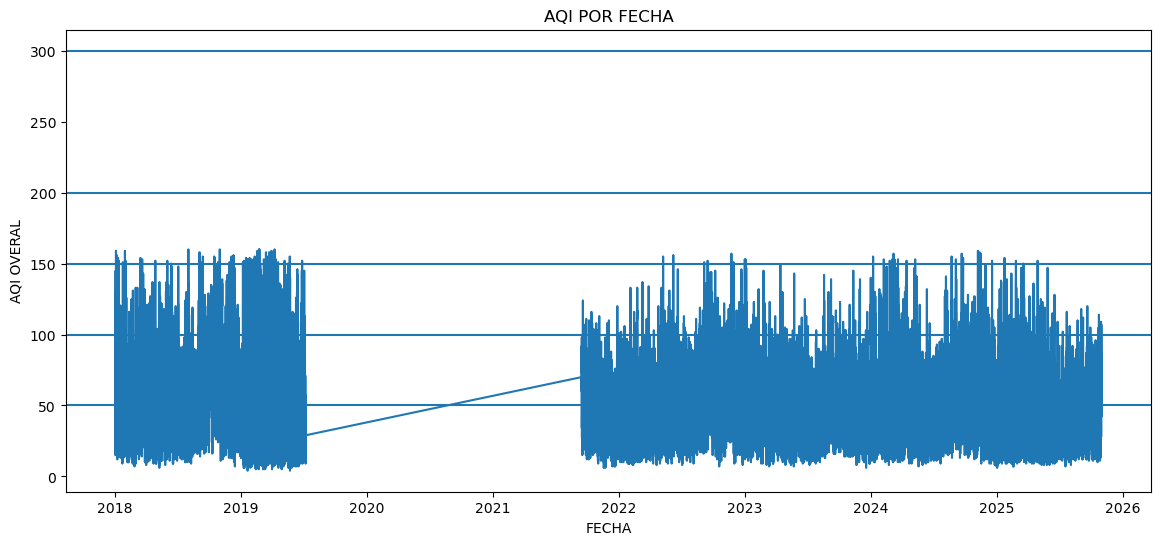

In [20]:
# GRAFICAR LOS DATOS AQI OVERALL VS FECHA CON LÍMITES SALUDABLES
plt.figure(figsize=(14,6))
plt.plot(df_filtered["FECHA"], df_filtered["AQI_OVERALL"])

plt.axhline(50)
plt.axhline(100)
plt.axhline(150)
plt.axhline(200)
plt.axhline(300)

plt.xlabel("FECHA")
plt.ylabel("AQI OVERAL")
plt.title("AQI POR FECHA")
plt.show()


<Figure size 1200x600 with 0 Axes>

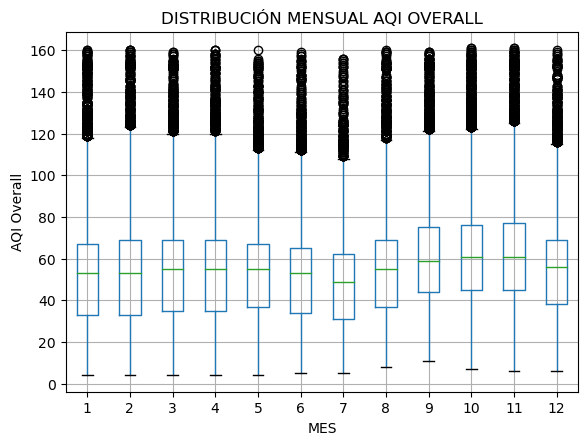

In [21]:
# GRÁFICO DE CAJAS AQI OVERALL VS MES
plt.figure(figsize=(12,6))
training_df.boxplot(column="AQI_OVERALL", by="Mes")

plt.xlabel("MES")
plt.ylabel("AQI Overall")
plt.title("DISTRIBUCIÓN MENSUAL AQI OVERALL")
plt.suptitle("")  # elimina título automático
plt.show()


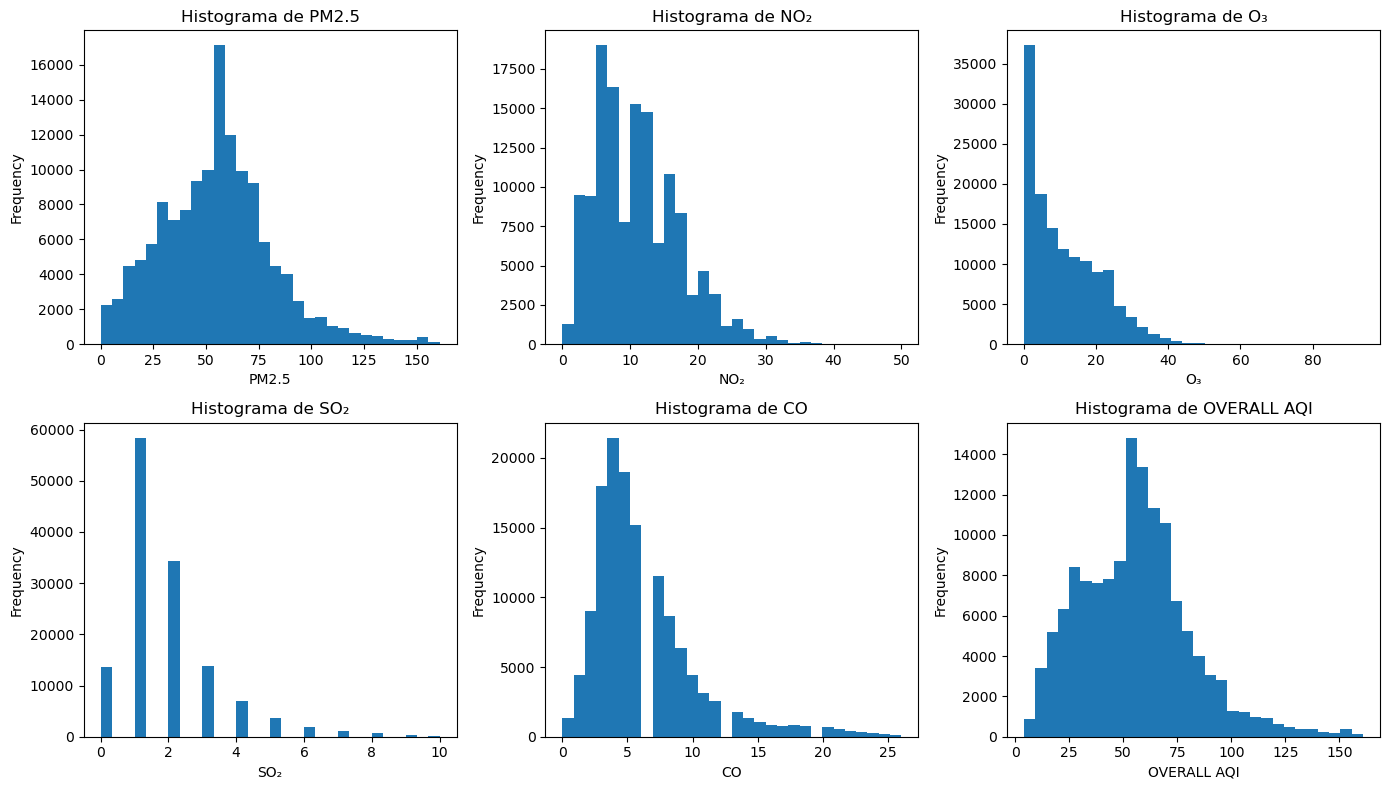

In [22]:
# HISTOGRAMA PARA CADA CONTAMINANTE
pollutants = {
    "PM25_AQI": "PM2.5",
    "NO2_AQI": "NO₂",
    "O3_AQI": "O₃",
    "SO2_AQI": "SO₂",
    "CO_AQI": "CO",
    "AQI_OVERALL": "OVERALL AQI"
}

plt.figure(figsize=(14,8))

for i, (col, label) in enumerate(pollutants.items(), 1):
    if col in training_df.columns:
        plt.subplot(2, 3, i)
        plt.hist(training_df[col], bins=30)
        plt.xlabel(label)
        plt.ylabel("Frequency")
        plt.title(f"Histograma de {label}")

plt.tight_layout()
plt.show()

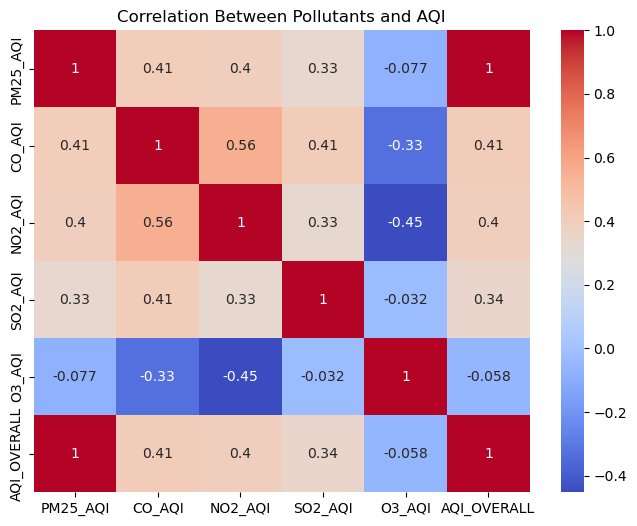

In [23]:
# GRAFICAR LA MATRIZ DE CORRELACIÓN DE CADA CONTAMINANTE
pollutants = ["PM25_AQI", "CO_AQI", "NO2_AQI", "SO2_AQI", "O3_AQI", "AQI_OVERALL"]

plt.figure(figsize=(8,6))
sns.heatmap(training_df[pollutants].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants and AQI")
plt.show()

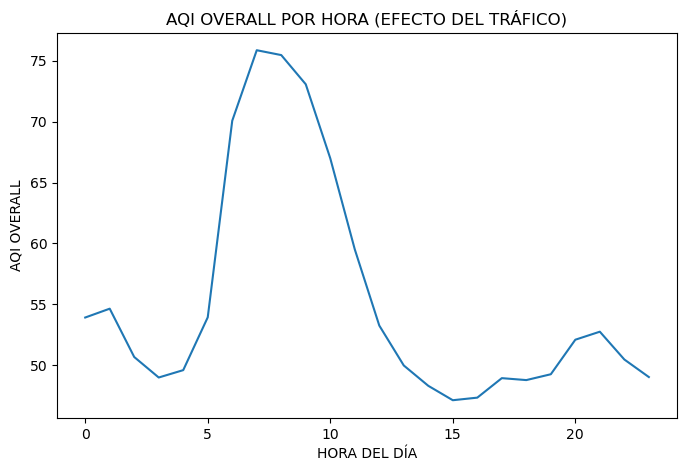

In [24]:
# GRAFICAR LA CALIDAD DEL AIRE USANDO EL AQI OVERALL POR HORA DEL DÍA
hourly_mean = training_df.groupby("Hora")["AQI_OVERALL"].mean()

plt.figure(figsize=(8,5))
plt.plot(hourly_mean.index, hourly_mean.values)
plt.xlabel("HORA DEL DÍA")
plt.ylabel("AQI OVERALL")
plt.title("AQI OVERALL POR HORA (EFECTO DEL TRÁFICO)")
plt.show()

In [25]:
# SELECCIONA EL AQI DE CADA DATASET COMO ENTRADA X PARA EL MODELO DE ENTRENAMIENTO
X = training_df[["PM25_AQI","CO_AQI", "NO2_AQI", "SO2_AQI","O3_AQI", "Anio", "Mes", "Dia", "Hora"]]

# ESTABLECE LA VARIABLE DE SALIDA
y = training_df['AQI_CATEGORY']

In [26]:
# CODIFICAR LA VARIABLE DE SALIDA (FEATURE ENGINERING)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
# DIVIDIR EL DATASET  DATOS DE ENTRENAMIENTO Y PRUEBA
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

In [28]:
rf = RandomForestClassifier(
    n_estimators=200, # DEFINE EL NÚMERO DE ARBOLES A GENERAR
    max_depth=3, # DEFINE EL TAMAÑO MÁXIMO DE CADA ÁRBOL
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [29]:
y_pred = rf.predict(X_test)

In [30]:
decision_tree = rf.estimators_[0]   # first tree

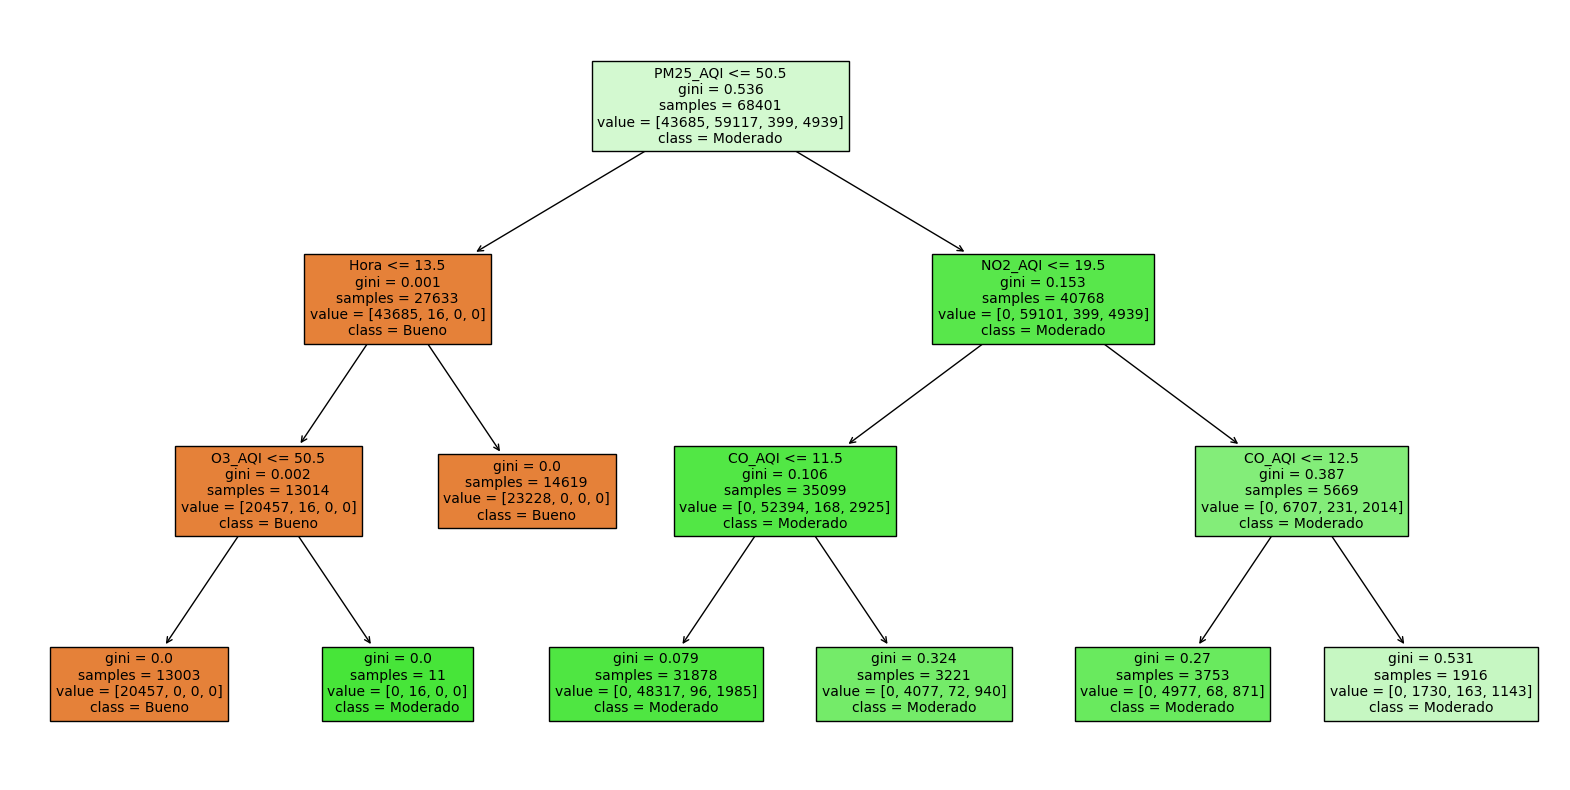

In [35]:
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    feature_names=list(X.columns),
    class_names=list(le.classes_),
    filled=True,
)
plt.show()

In [ ]:
# EXPORTAR EL ÁRBOL DE DECISIÓN SELECCIONADO EN FORMATO PDF
dot = export_graphviz(
    decision_tree,
    out_file=None,
    feature_names=list(X.columns),
    class_names=list(le.classes_),
    filled=True,
    rounded=True,
    precision=2,
    proportion=True,
    impurity=True,
    special_characters=True
)

graph = graphviz.Source(dot)
# Save high-quality vector files
graph.format = "pdf"   # or "svg"
graph.render("tree0", cleanup=True)

In [36]:
# DECODIFICAR LOS DATOS CODIFICADOS USANDO FEATURE ENGINERING
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

In [38]:
#training_df.rename(columns={training_df.columns[0]: "FECHA"}, inplace=True)
#training_df.rename(columns={"Unnamed: 0": "FECHA"}, inplace=True)
print(training_df.describe)

<bound method NDFrame.describe of                      FECHA  CO_AQI Categoria_CO  NO2_AQI Categoria_NO2  \
0      2005-04-28 04:00:00      18        Bueno     11.0         Bueno   
1      2005-04-28 05:00:00      20        Bueno     12.0         Bueno   
2      2005-04-28 06:00:00      25        Bueno     13.0         Bueno   
3      2005-04-28 07:00:00      25        Bueno     14.0         Bueno   
4      2005-04-28 08:00:00      22        Bueno     14.0         Bueno   
...                    ...     ...          ...      ...           ...   
135193 2025-10-31 19:00:00       6        Bueno     26.0         Bueno   
135194 2025-10-31 20:00:00       6        Bueno     26.0         Bueno   
135195 2025-10-31 21:00:00      13        Bueno     29.0         Bueno   
135196 2025-10-31 22:00:00      18        Bueno     25.0         Bueno   
135197 2025-10-31 23:00:00      13        Bueno     21.0         Bueno   

        O3_AQI Categoria_O3  SO2_AQI Categoria_SO2  PM25_AQI Categoria_PM25  

In [37]:
class_names = [
    "Bueno",
    "Moderado",
    "NSGS",
    "No saludable",
    "Muy poco saludable",
    "Peligrosa"
]

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10902
           1       0.93      1.00      0.97     14796
           2       0.00      0.00      0.00       109
           3       0.92      0.23      0.36      1229

    accuracy                           0.96     27036
   macro avg       0.71      0.56      0.58     27036
weighted avg       0.96      0.96      0.95     27036



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [40]:
def plot_confusion_matrix(model, X_test, y_test, title, class_names):
    cm = confusion_matrix(y_test, model.predict(X_test))

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("PREDICCIONES")
    plt.ylabel("VALORES REALES")
    plt.title(title)
    plt.tight_layout()
    plt.show()


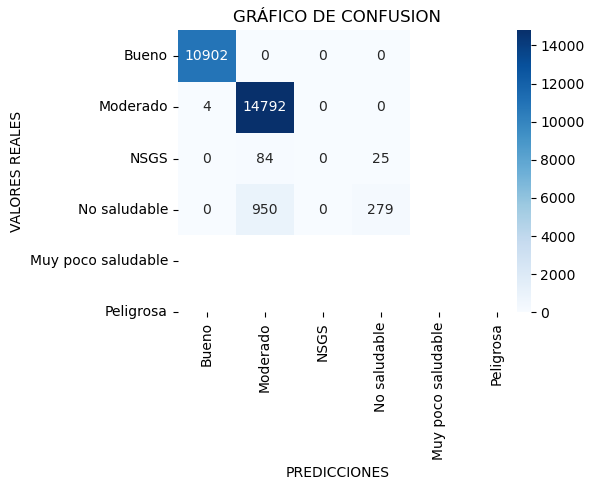

In [41]:
# GRAFICAR LA MATRIZ DE CONFUSIÓN 
plot_confusion_matrix(rf, X_test, y_test, "GRÁFICO DE CONFUSION", class_names)

In [45]:
new_data = pd.DataFrame({
    "PM25_AQI": [24],
    "Categoría": ["Bueno"],
    "FECHA": ["2026-01-07 15:00:00"],
    "CO_AQI":[20],
    "Categoria_CO": ["Bueno"],
    "NO2_AQI": [11],
    "Categoria_NO2": ["No saludable"],
    "O3_AQI": [12],
    "Categoria_O3": ["No Saludable"],
    "SO2_AQI": [44],
    "Categoria_SO2": ["Bueno"],
})

new_data['FECHA'] = pd.to_datetime(new_data['FECHA'])

new_data["Anio"] = new_data["FECHA"].dt.year
new_data["Mes"] = new_data["FECHA"].dt.month
new_data["Dia"] = new_data["FECHA"].dt.day
new_data["Hora"] = new_data["FECHA"].dt.hour

new_data

,PM25_AQI,Categoría,FECHA,CO_AQI,Categoria_CO,NO2_AQI,Categoria_NO2,O3_AQI,Categoria_O3,SO2_AQI,Categoria_SO2,Anio,Mes,Dia,Hora
0,24,Bueno,2026-01-07 15:00:00,20,Bueno,11,No saludable,12,No Saludable,44,Bueno,2026,1,7,15


In [ ]:
print(new_data.dtypes)

In [48]:
X_test = new_data[["PM25_AQI","CO_AQI", "NO2_AQI", "SO2_AQI","O3_AQI", "Anio", "Mes", "Dia", "Hora"]]
X_test

,PM25_AQI,CO_AQI,NO2_AQI,SO2_AQI,O3_AQI,Anio,Mes,Dia,Hora
0,24,20,11,44,12,2026,1,7,15


In [50]:
y_pred = rf.predict(X_test)

In [51]:
y_pred_labels = le.inverse_transform(y_pred)

print("Predicted classes:")
for y in y_pred_labels:
 print(y)


Predicted classes:
Bueno
